In [3]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"

In [4]:
import requests
import pandas as pd
import time
import requests
import pandas as pd


# Load the annotated file
df = pd.read_csv("~/Desktop/Capstone/Notebook recent/combined_de_genes_annotated.csv")
df.head(5)

# Select and reorder relevant columns
# final_df = df[[
#     "Gene_upper", "Dataset", "p_value", "log2_fc", "mean_diff",
#     "DGIdb_status", "BreastCancerTrial", "Pathway"
# ]].rename(columns={
#     "Gene_upper": "Gene",
#     "p_value": "P-value",
#     "log2_fc": "log2FC",
#     "mean_diff": "Mean Difference",
#     "DGIdb_status": "DGIdb Status",
#     "BreastCancerTrial": "Has Breast Cancer Trial",
#     "Pathway": "Pathway Category"
# })

# Sort by Dataset and then log2FC
#final_df = final_df.sort_values(by=["Dataset", "log2FC"], ascending=[True, False])

# Save the final table
#final_df.to_csv("~/Desktop/Capstone/Notebook recent/final_master_gene_table.csv", index=False)
#print("✅ Final master table saved as final_master_gene_table.csv")

,gene,p_value,log2_fc,mean_diff,Dataset,Gene_upper,DGIdb_status,BreastCancerTrial,Pathway
0,CDK4,0.0,2.428112,0.105542,GSE180286,CDK4,FDA-approved,True,CDK4–CCND1 Axis
1,CDKN1A,0.0,3.365022,0.134859,GSE180286,CDKN1A,NaN,False,Other
2,ERBB2,0.0,4.833174,0.267847,GSE180286,ERBB2,FDA-approved,True,Other
3,CCND1,0.0,4.525871,0.483840,GSE180286,CCND1,NaN,True,CDK4–CCND1 Axis
4,CDKN2A,0.0,3.926487,0.074630,GSE180286,CDKN2A,NaN,False,Other


In [30]:
import pandas as pd

# 🔹 Step 1: Load the annotated gene table
df = pd.read_csv("~/Desktop/Capstone/Notebook recent/combined_de_genes_annotated.csv")

# 🔹 Step 2: Basic cleanup
df["DGIdb_status"] = df["DGIdb_status"].fillna("Not Targeted")
df["BreastCancerTrial"] = df["BreastCancerTrial"].astype(bool)

# Optional: drop redundant columns if needed
# df = df.drop(columns=["gene", "Gene_upper"])  # if you want to keep only one column for gene name

# 🔹 Step 3: Select and rename columns for clarity
final_df = df[[
    "Gene_upper", "Dataset", "p_value", "log2_fc", "mean_diff",
    "DGIdb_status", "BreastCancerTrial", "Pathway"
]].rename(columns={
    "Gene_upper": "Gene",
    "p_value": "P-value",
    "log2_fc": "log2FC",
    "mean_diff": "Mean Difference",
    "DGIdb_status": "DGIdb Status",
    "BreastCancerTrial": "Has Breast Cancer Trial",
    "Pathway": "Pathway Category"
})

# 🔹 Step 4: Sort by dataset and log2 fold-change
final_df = final_df.sort_values(by=["Dataset", "log2FC"], ascending=[True, False])

# 🔹 Step 5: Save to disk
final_df.to_csv("~/Desktop/Capstone/Notebook recent/final_master_gene_table_24July.csv", index=False)
print("✅ Final master table saved as final_master_gene_table_24July.csv")


✅ Final master table saved as final_master_gene_table_24July.csv


In [31]:
df = pd.read_csv("~/Desktop/Capstone/Notebook recent/final_master_gene_table_24July.csv")
print(df.head(5))

     Gene    Dataset       P-value    log2FC  Mean Difference  DGIdb Status  \
0     WT1  GSE161529  1.302410e-46  3.432435         0.001784  Not Targeted   
1   ERBB2  GSE161529  0.000000e+00  3.260088         0.789027  FDA-approved   
2     MET  GSE161529  0.000000e+00  3.249633         0.127505  Not Targeted   
3  CDKN2A  GSE161529  0.000000e+00  3.184546         0.404804  Not Targeted   
4    EGFR  GSE161529  0.000000e+00  3.021959         0.151644  FDA-approved   

   Has Breast Cancer Trial Pathway Category  
0                    False            Other  
1                     True            Other  
2                    False            Other  
3                    False            Other  
4                     True   PI3K–MAPK–EGFR  


In [32]:
import altair as alt

bar_pathway = alt.Chart(df).mark_bar().encode(
    x=alt.X('Gene:N', sort='-y', title='Gene', axis=alt.Axis(labelAngle=45)),
    y=alt.Y('log2FC:Q', title='log2 Fold Change'),
    color=alt.Color('Pathway Category:N'),
    tooltip=['Gene', 'log2FC', 'Pathway Category']
).properties(
    title='log2FC of Genes by Pathway Category',
    width=600,
    height=400
)

bar_pathway.show()


alt.Chart(...)

In [33]:
import altair as alt

bar_dgidb = alt.Chart(df).mark_bar().encode(
    x=alt.X('Gene:N', sort='-y', title='Gene', axis=alt.Axis(labelAngle=45)),
    y=alt.Y('log2FC:Q', title='log2 Fold Change'),
    color=alt.Color('DGIdb Status:N'),
    tooltip=['Gene', 'log2FC', 'DGIdb Status']
).properties(
    title='log2FC of Genes by Drug Status (DGIdb)',
    width=600,
    height=400
)

bar_dgidb.show()


alt.Chart(...)

/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_27345/3985430799.py:69: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  plt.legend(handles=ax.get_legend().legendHandles + hatch_legend, title="DGIdb Status / Trial", loc="upper right")


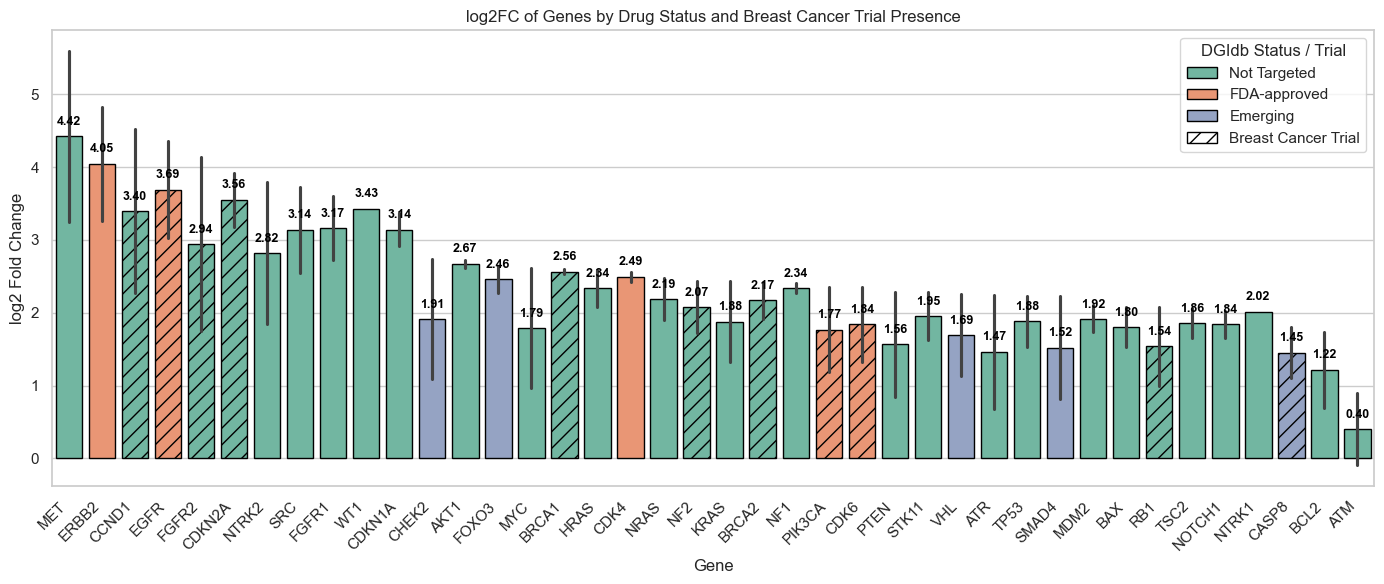

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data
#df = pd.read_csv("final_master_gene_table.csv")
df = pd.read_csv("final_master_gene_table_24July.csv")
# Fill missing DGIdb status
#df["DGIdb Status"] = df["DGIdb Status"].fillna("Unknown")
df['DGIdb Status'] = df['DGIdb Status'].fillna('No known drugs')


# Map Boolean to string for consistency
df["Has Breast Cancer Trial"] = df["Has Breast Cancer Trial"].map({True: "Yes", False: "No"})

# Sort by log2FC
df = df.sort_values("log2FC", ascending=False)

# Set up the plot
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

# Define hatches for bar patterns
hatches = ["//" if x == "Yes" else "" for x in df["Has Breast Cancer Trial"]]

# Create barplot
ax = sns.barplot(
    x="Gene",
    y="log2FC",
    hue="DGIdb Status",
    data=df,
    dodge=False,
    palette="Set2",
    edgecolor="black"
)

# Apply hatch pattern per bar
for bar, hatch in zip(ax.patches, hatches):
    bar.set_hatch(hatch)

# ✅ Add values above bars
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        ax.annotate(
            f"{height:.2f}",
            xy=(p.get_x() + p.get_width() / 2., height),
            xytext=(0, 6),  # shift text 6 points above the bar
            textcoords="offset points",
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold',
            color='black'
        )

# Apply hatch pattern per bar
for bar, hatch in zip(ax.patches, hatches):
    bar.set_hatch(hatch)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.ylabel("log2 Fold Change")
plt.xlabel("Gene")
plt.title("log2FC of Genes by Drug Status and Breast Cancer Trial Presence")

# Add legend for hatches
import matplotlib.patches as mpatches
hatch_legend = [mpatches.Patch(facecolor='white', edgecolor='black', hatch='//', label='Breast Cancer Trial')]
plt.legend(handles=ax.get_legend().legendHandles + hatch_legend, title="DGIdb Status / Trial", loc="upper right")

plt.tight_layout()
# ✅ Save the figure before showing it
plt.savefig("gene_log2FC_drug_trial_plot.png", dpi=300, bbox_inches='tight')  # or .pdf

plt.show()

/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_27345/3824986119.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


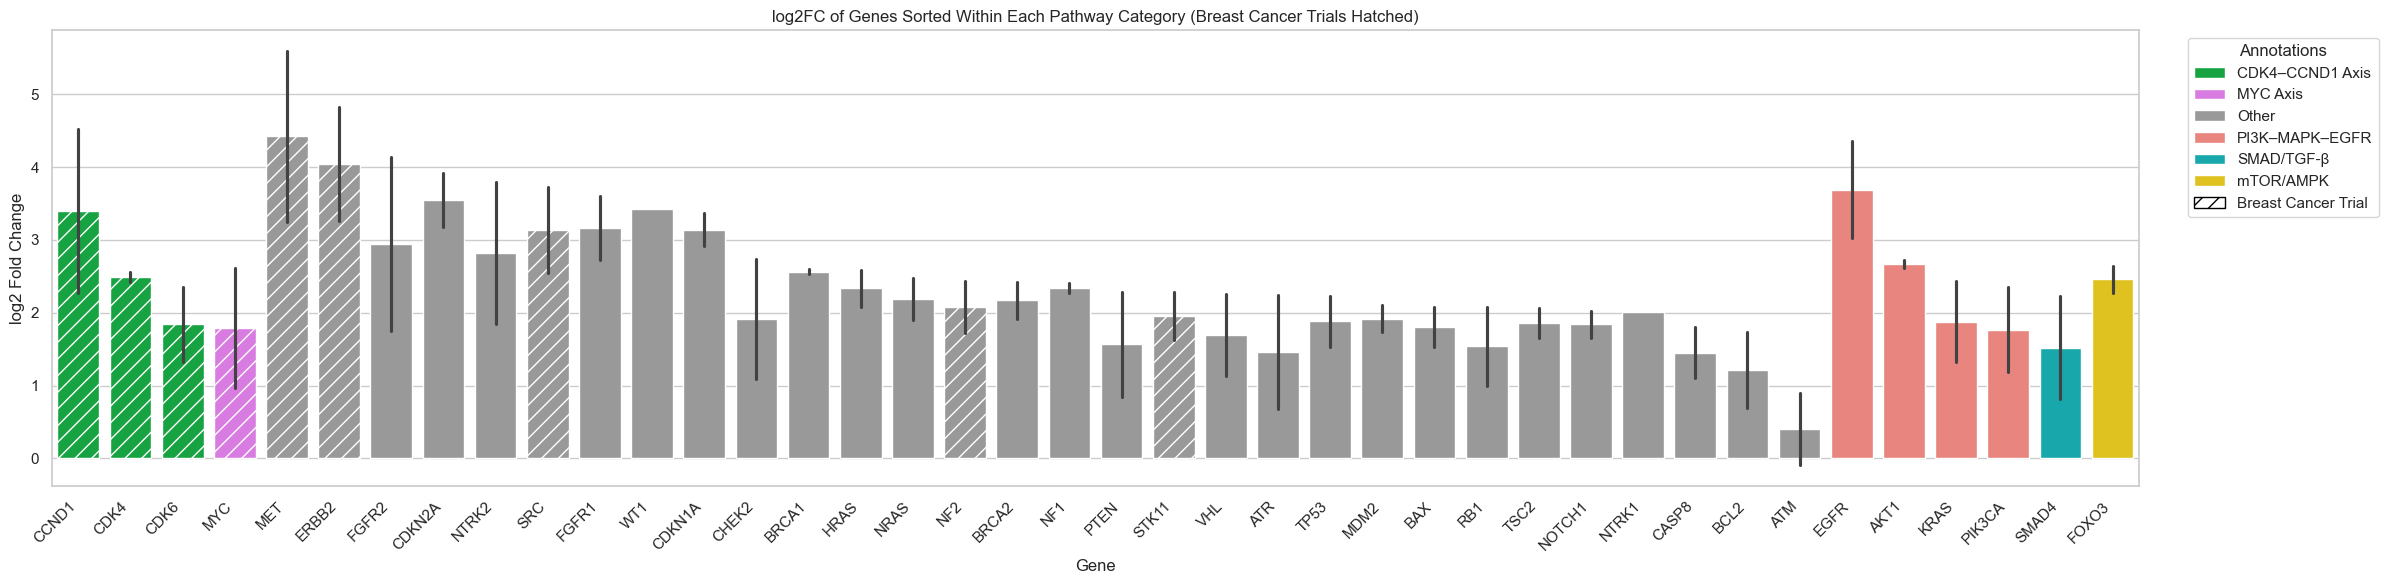

In [35]:
from matplotlib.patches import Patch
# Load your CSV
#df = pd.read_csv("final_master_gene_table.csv")

# Define colors for pathway categories
pathway_palette = {
    "PI3K–MAPK–EGFR": "#F8766D",
    "CDK4–CCND1 Axis": "#00BA38",
    "MYC Axis": "#E76BF3",
    "mTOR/AMPK": "#FFD700",
    "SMAD/TGF-β": "#00BFC4",
    "Other": "#999999"
}

#Fix vague labels
df["DGIdb Status"] = df["DGIdb Status"].replace({"null": "No known drugs"})
df["Pathway Category"] = df["Pathway Category"].fillna("Other")

# Sort by Pathway and then by log2FC descending
df_sorted = df.sort_values(by=["Pathway Category", "log2FC"], ascending=[True, False]).reset_index(drop=True)

# Set gene order for plotting
#df_sorted["Gene"] = pd.Categorical(df_sorted["Gene"], categories=df_sorted["Gene"], ordered=True)
df_sorted["Gene"] = pd.Categorical(df_sorted["Gene"], categories=df_sorted["Gene"].unique(), ordered=True)


# Plot
plt.figure(figsize=(24, 6))
ax = sns.barplot(
    data=df_sorted,
    x="Gene", y="log2FC",
    hue="Pathway Category",
    dodge=False,
    palette=pathway_palette,
    order=df_sorted["Gene"]
)
# Rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add hatching for breast cancer trial genes
bars = ax.patches
for bar, (_, row) in zip(bars, df_sorted.iterrows()):
    if row["Has Breast Cancer Trial"] == "Yes":
        bar.set_hatch("//")

# Title and labels
plt.title("log2FC of Genes Sorted Within Each Pathway Category (Breast Cancer Trials Hatched)")
plt.ylabel("log2 Fold Change")
plt.xlabel("Gene")

# Custom legend with hatching
handles, labels = ax.get_legend_handles_labels()
handles.append(Patch(facecolor='white', edgecolor='black', hatch='//', label='Breast Cancer Trial'))
ax.legend(handles=handles, title="Annotations", bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

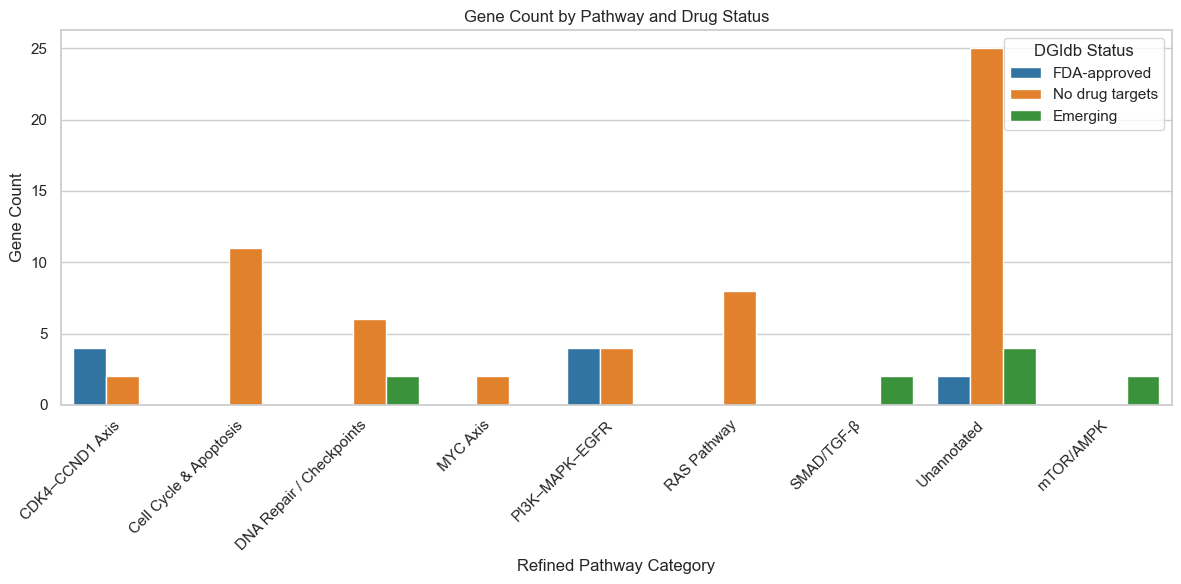

In [48]:
#Pathway × DGIdb status (i.e., therapeutic landscape summary)

grouped = df.groupby(["Refined Pathway Category", "DGIdb Status"]).size().reset_index(name="Gene Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x="Refined Pathway Category", y="Gene Count", hue="DGIdb Status", palette="tab10")
plt.xticks(rotation=45, ha='right')
plt.title("Gene Count by Pathway and Drug Status")
plt.tight_layout()
plt.show()



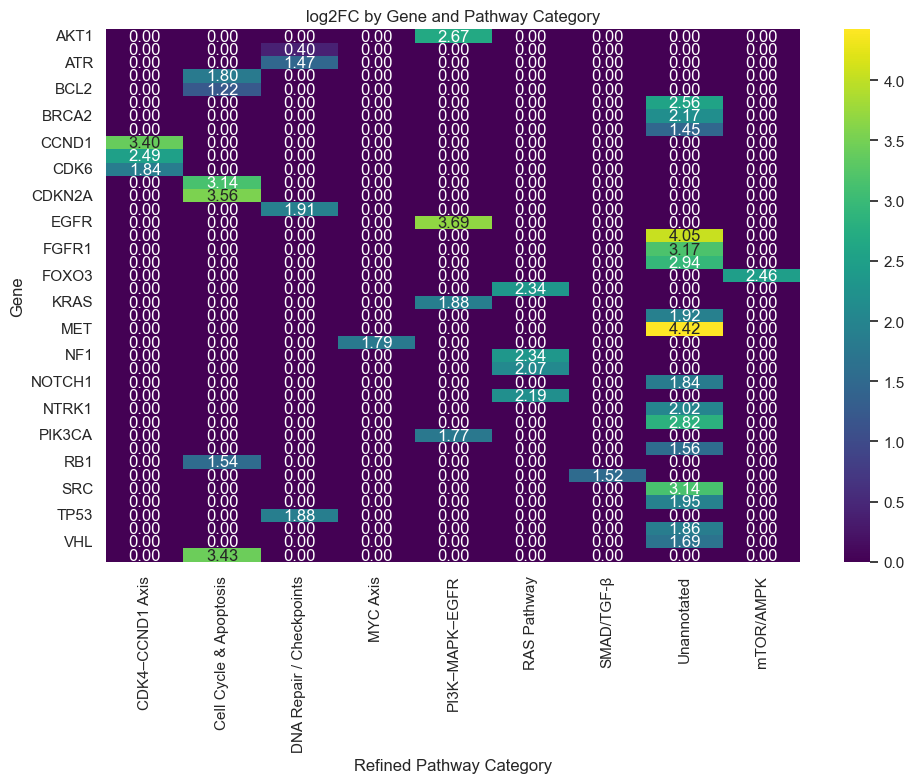

In [49]:
##Heatmap of log2FC by Gene × Pathway

heatmap_df = df.pivot_table(
    index="Gene",
    columns="Refined Pathway Category",
    values="log2FC",
    aggfunc="mean"
).fillna(0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, cmap="viridis", annot=True, fmt=".2f")
plt.title("log2FC by Gene and Pathway Category")
plt.tight_layout()
plt.show()


In [52]:
import altair as alt
import pandas as pd

# Assume df_annotated is your DataFrame with 'Gene', 'Refined Pathway Category', 'log2FC'
#df = df_annotated.copy()
df = df[df["log2FC"] > 0]  # Only meaningful values

dotplot = alt.Chart(df).mark_circle().encode(
    x=alt.X("Refined Pathway Category:N", title="Pathway", sort="-y"),
    y=alt.Y("Gene:N", title="Gene", sort="-x"),
    size=alt.Size("log2FC:Q", title="log2FC"),
    color=alt.Color("log2FC:Q", scale=alt.Scale(scheme="viridis")),
    tooltip=["Gene", "Refined Pathway Category", "log2FC"]
).properties(
    title="log2FC Dot Plot by Gene and Pathway",
    width=600,
    height=400
).interactive()

dotplot



alt.Chart(...)

### stop the analysis at this point..don't run the codes below for our capstone

In [37]:
# Manually curated mapping for "Other" genes into more informative categories
manual_reclassification = {
    "TP53": "DNA Repair / Checkpoints",
    "CDKN1A": "Cell Cycle & Apoptosis",
    "CDKN2A": "Cell Cycle & Apoptosis",
    "RB1": "Cell Cycle & Apoptosis",
    "CDK4": "Cell Cycle & Apoptosis",
    "CDK6": "Cell Cycle & Apoptosis",
    "BCL2": "Cell Cycle & Apoptosis",
    "BAX": "Cell Cycle & Apoptosis",
    "ATM": "DNA Repair / Checkpoints",
    "ATR": "DNA Repair / Checkpoints",
    "CHEK2": "DNA Repair / Checkpoints",
    "WT1": "Cell Cycle & Apoptosis",
    "SMAD4": "TGF-β / SMAD Signaling",
    "NF1": "RAS Pathway",
    "NF2": "RAS Pathway",
    "HRAS": "RAS Pathway",
    "NRAS": "RAS Pathway"
}

# Function to apply new subcategories
def refine_pathway(row):
    if row["Pathway Category"] == "Other":
        return manual_reclassification.get(row["Gene"], "Unannotated")
    else:
        return row["Pathway Category"]

# Apply refinement
df["Refined Pathway Category"] = df.apply(refine_pathway, axis=1)
print(df["Refined Pathway Category"].value_counts())

Refined Pathway Category
Unannotated                 31
Cell Cycle & Apoptosis      11
PI3K–MAPK–EGFR               8
DNA Repair / Checkpoints     8
RAS Pathway                  8
CDK4–CCND1 Axis              6
mTOR/AMPK                    2
MYC Axis                     2
SMAD/TGF-β                   2
Name: count, dtype: int64


In [24]:
# Manually curated mapping for "Other" genes into more informative categories
# manual_reclassification = {
#     "TP53": "DNA Repair / Checkpoints",
#     "CDKN1A": "Cell Cycle & Apoptosis",
#     "CDKN2A": "Cell Cycle & Apoptosis",
#     "RB1": "Cell Cycle & Apoptosis",
#     "CDK4": "Cell Cycle & Apoptosis",
#     "CDK6": "Cell Cycle & Apoptosis",
#     "BCL2": "Cell Cycle & Apoptosis",
#     "BAX": "Cell Cycle & Apoptosis",
#     "ATM": "DNA Repair / Checkpoints",
#     "ATR": "DNA Repair / Checkpoints",
#     "CHEK2": "DNA Repair / Checkpoints",
#     "WT1": "Cell Cycle & Apoptosis",
#     "SMAD4": "TGF-β / SMAD Signaling",
#     "NF1": "RAS Pathway",
#     "NF2": "RAS Pathway",
#     "HRAS": "RAS Pathway",
#     "NRAS": "RAS Pathway",
#     # Any gene not listed will be labeled as "Unannotated"
# }

# # Function to apply new subcategories
# def refine_pathway(row):
#     if row["Pathway Category"] == "Other":
#         return manual_reclassification.get(row["Gene"], "Unannotated")
#     else:
#         return row["Pathway Category"]
# df["Gene"] = df["Gene"].str.upper()  # If not already uppercase

# # Apply refinement
# df["Refined Pathway Category"] = df.apply(refine_pathway, axis=1)
# print(df["Refined Pathway Category"].value_counts())

Refined Pathway Category
Unannotated                 31
Cell Cycle & Apoptosis      11
PI3K–MAPK–EGFR               8
DNA Repair / Checkpoints     8
RAS Pathway                  8
CDK4–CCND1 Axis              6
mTOR/AMPK                    2
MYC Axis                     2
SMAD/TGF-β                   2
Name: count, dtype: int64


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_27345/3146477634.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_xticklabels(bar.get_xticklabels(), rotation=45, ha='right')


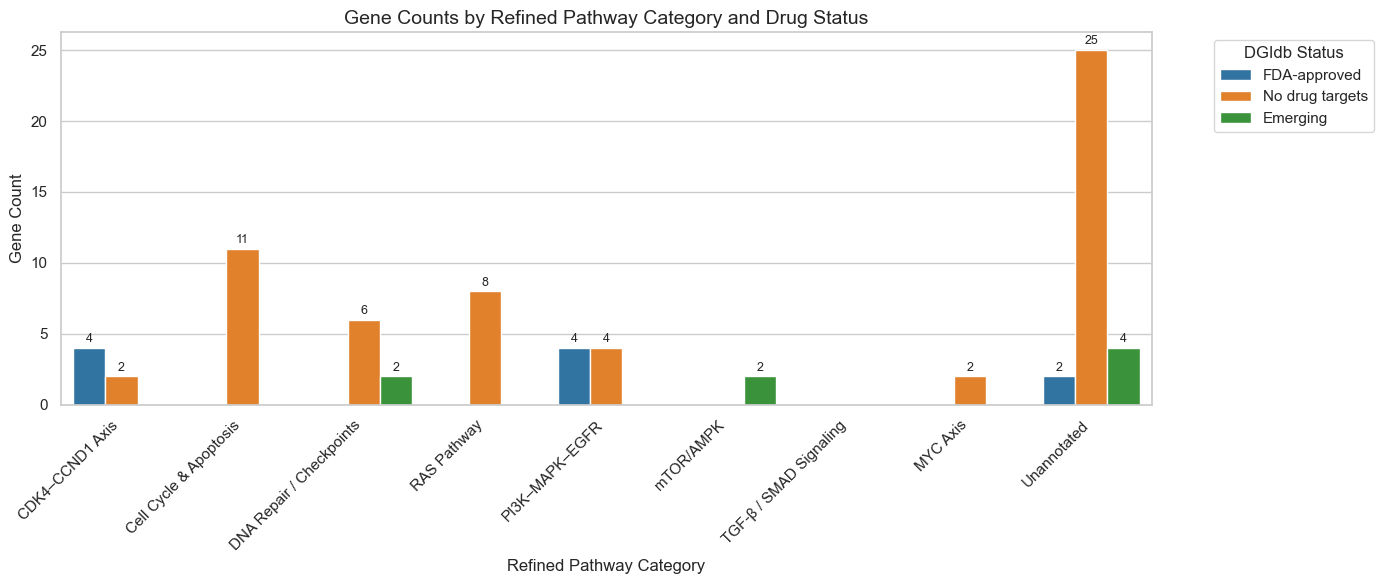

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
#df = pd.read_csv("final_master_gene_table_24July.csv")

# Strip column names just in case
df.columns = df.columns.str.strip()

# Ensure column exists
assert "Refined Pathway Category" in df.columns, "Column 'Refined Pathway Category' not found!"

# Drop any rows with missing pathway
df = df[~df["Refined Pathway Category"].isna()]

# Simplify/standardize DGIdb statuses
df["DGIdb Status"] = df["DGIdb Status"].replace({
    "Unknown": "No drug targets",
    "null": "No drug targets",
    "Not Targeted": "No drug targets",
    pd.NA: "No drug targets",
    None: "No drug targets"
})
df["DGIdb Status"] = df["DGIdb Status"].fillna("No drug targets")

# Group by Refined Pathway Category × Drug Status
grouped = df.groupby(["Refined Pathway Category", "DGIdb Status"]).size().reset_index(name="Gene Count")

# Optional: Custom order for pathway categories
custom_order = [
    "CDK4–CCND1 Axis",
    "Cell Cycle & Apoptosis",
    "DNA Repair / Checkpoints",
    "RAS Pathway",
    "PI3K–MAPK–EGFR",
    "mTOR/AMPK",
    "TGF-β / SMAD Signaling",  # or "SMAD/TGF-β" if that’s what your data uses
    "MYC Axis",
    "Unannotated"
]

# Enforce ordering for x-axis
grouped["Refined Pathway Category"] = pd.Categorical(
    grouped["Refined Pathway Category"],
    categories=custom_order,
    ordered=True
)
grouped = grouped.sort_values("Refined Pathway Category")

# Plot
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

bar = sns.barplot(
    data=grouped,
    x="Refined Pathway Category",
    y="Gene Count",
    hue="DGIdb Status",
    palette="tab10"
)

# Add counts above bars
for container in bar.containers:
    bar.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

# Rotate x labels
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, ha='right')

# Titles and labels
plt.title("Gene Counts by Refined Pathway Category and Drug Status", fontsize=14)
plt.xlabel("Refined Pathway Category")
plt.ylabel("Gene Count")

# Legend placement
plt.legend(title="DGIdb Status", bbox_to_anchor=(1.05, 1), loc="upper left")

# Tight layout and save
plt.tight_layout()
plt.savefig("gene_counts_by_pathway_and_drugstatus.png", dpi=300, bbox_inches='tight')
plt.show()


In [39]:
df.head(5)

,Gene,Dataset,P-value,log2FC,Mean Difference,DGIdb Status,Has Breast Cancer Trial,Pathway Category,Refined Pathway Category
40,MET,GSE180286,5.054114e-74,5.594285,0.006545,No drug targets,No,Other,Unannotated
41,ERBB2,GSE180286,0.000000e+00,4.833174,0.267847,FDA-approved,Yes,Other,Unannotated
42,CCND1,GSE180286,0.000000e+00,4.525871,0.483840,No drug targets,Yes,CDK4–CCND1 Axis,CDK4–CCND1 Axis
43,EGFR,GSE180286,7.054600e-69,4.360219,0.007754,FDA-approved,Yes,PI3K–MAPK–EGFR,PI3K–MAPK–EGFR
44,FGFR2,GSE180286,1.134424e-31,4.142219,0.003312,No drug targets,No,Other,Unannotated


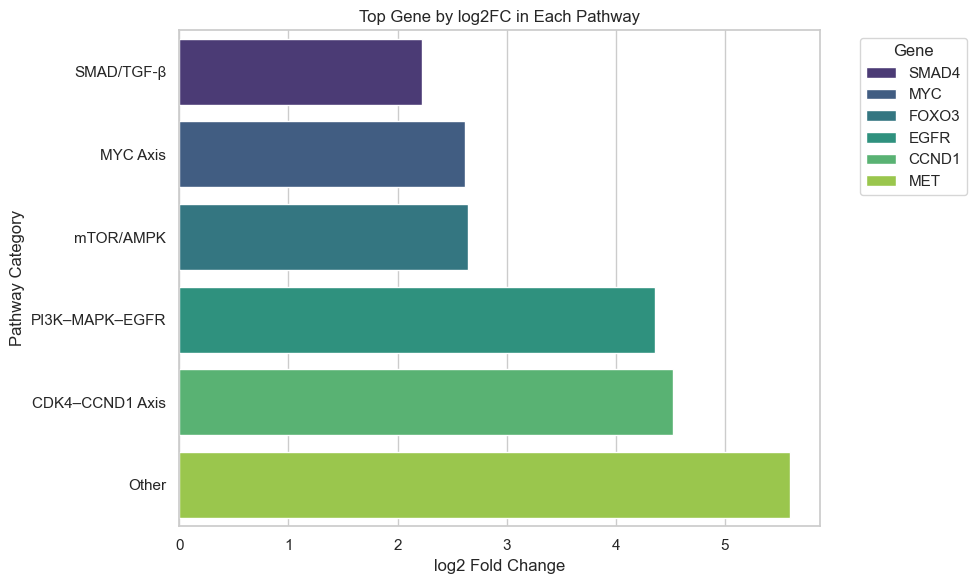

In [55]:
## Top Gene per Pathway by log2FC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the annotated DE genes CSV
df = pd.read_csv("combined_de_genes_annotated.csv")

# Filter out any rows with missing pathway info (optional)
df = df[df["Pathway"].notna()]

# For clarity, only keep one entry per gene per dataset (take max log2_fc if duplicate)
df_unique = df.sort_values("log2_fc", ascending=False).drop_duplicates(subset=["Gene_upper", "Pathway"])

# Get the top gene (by log2_fc) in each pathway
top_genes = df_unique.loc[df_unique.groupby("Pathway")["log2_fc"].idxmax()]

# Sort for better visualization
top_genes = top_genes.sort_values("log2_fc", ascending=True)

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_genes,
    x="log2_fc",
    y="Pathway",
    hue="Gene_upper",
    dodge=False,
    palette="viridis"
)
plt.title("Top Gene by log2FC in Each Pathway")
plt.xlabel("log2 Fold Change")
plt.ylabel("Pathway Category")
plt.legend(title="Gene", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


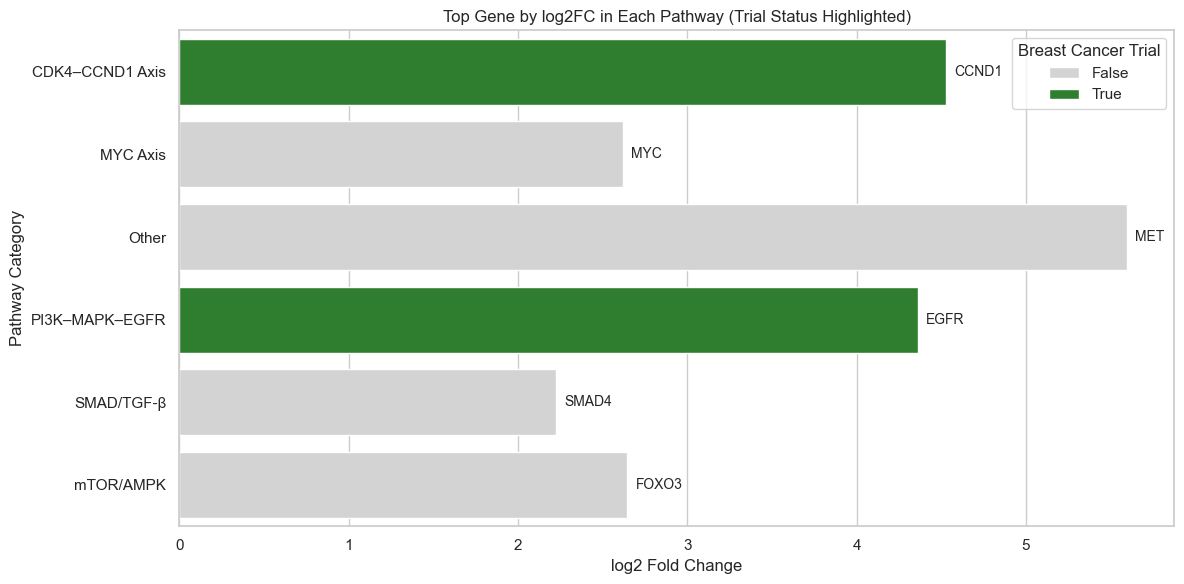

In [54]:
## Top gene per pathway by coloring the bars based on trial status.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the annotated dataset
df = pd.read_csv("combined_de_genes_annotated.csv")

# Keep only relevant columns
df_filtered = df[["Gene_upper", "log2_fc", "Pathway", "BreastCancerTrial"]].copy()

# Replace any missing pathways with 'Other'
df_filtered["Pathway"] = df_filtered["Pathway"].fillna("Other")

# Identify the top gene (highest log2_fc) in each pathway
top_genes = df_filtered.sort_values("log2_fc", ascending=False).groupby("Pathway").first().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_genes,
    y="Pathway",
    x="log2_fc",
    hue="BreastCancerTrial",  # Adds color based on trial status
    dodge=False,  # Prevents bar separation
    palette={True: "forestgreen", False: "lightgray"}
)

# Add gene labels inside bars
for i, row in top_genes.iterrows():
    plt.text(
        row["log2_fc"] + 0.05, i, row["Gene_upper"],
        va='center', ha='left', fontsize=10
    )

plt.title("Top Gene by log2FC in Each Pathway (Trial Status Highlighted)")
plt.xlabel("log2 Fold Change")
plt.ylabel("Pathway Category")
plt.legend(title="Breast Cancer Trial")
plt.tight_layout()
plt.show()




/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_27345/1008086147.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["abs_log2_fc"] = plot_df["log2_fc"].abs()


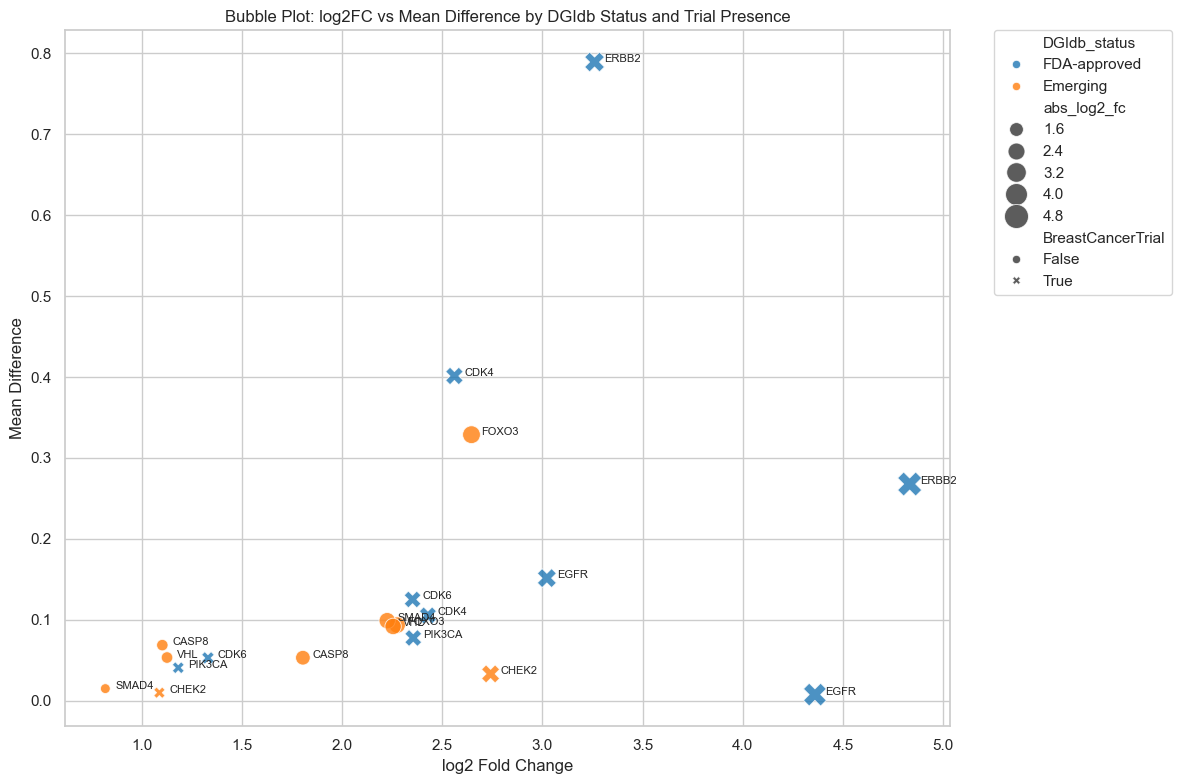

In [57]:
##  Here's the full Bubble Plot code where:
## x-axis = log2_fc
## y-axis = mean_diff
##color = DGIdb_status
##shape = BreastCancerTrial (True/False)
##size = absolute log2_fc

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the annotated dataset
df = pd.read_csv("combined_de_genes_annotated.csv")

# Drop rows with missing values in relevant columns
plot_df = df.dropna(subset=["log2_fc", "mean_diff", "DGIdb_status", "BreastCancerTrial"])

# Optional: Add column for size (based on magnitude of log2_fc)
plot_df["abs_log2_fc"] = plot_df["log2_fc"].abs()

# Set figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create the bubble plot
bubble = sns.scatterplot(
    data=plot_df,
    x="log2_fc",
    y="mean_diff",
    hue="DGIdb_status",
    style="BreastCancerTrial",
    size="abs_log2_fc",
    sizes=(50, 300),  # Scale of bubbles
    alpha=0.8,
    palette="tab10"
)

# Annotate gene names
for i, row in plot_df.iterrows():
    plt.text(row["log2_fc"] + 0.05, row["mean_diff"], row["Gene_upper"], fontsize=8)

# Axis labels and title
plt.title("Bubble Plot: log2FC vs Mean Difference by DGIdb Status and Trial Presence")
plt.xlabel("log2 Fold Change")
plt.ylabel("Mean Difference")

# Legends
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()






In [66]:
import pandas as pd
import altair as alt

# Load data
df = pd.read_csv("combined_de_genes_annotated.csv")

# Filter to GSE180286 only
df_180286 = df[df["Dataset"] == "GSE180286"].copy()

# Label only genes with strong expression change
df_180286["label"] = df_180286.apply(lambda x: x["Gene_upper"] if abs(x["log2_fc"]) > 2 else "", axis=1)

# BUBBLE PLOT
bubble_180286 = alt.Chart(df_180286).mark_point(filled=True).encode(
    x=alt.X("log2_fc", title="log2 Fold Change"),
    y=alt.Y("mean_diff", title="Mean Difference"),
    size=alt.Size("mean_diff", legend=alt.Legend(title="Mean Difference"), scale=alt.Scale(range=[60, 800])),  # Larger bubbles
    color=alt.Color("DGIdb_status", legend=alt.Legend(title="Drug Status")),
    shape=alt.Shape("BreastCancerTrial", legend=alt.Legend(title="Breast Cancer Trial")),
    tooltip=["Gene_upper", "log2_fc", "mean_diff", "DGIdb_status", "BreastCancerTrial"]
).properties(
    title="Bubble Plot (GSE180286): log2FC vs Mean Difference (Larger Dots, Annotated)",
    width=650,
    height=450
)

# TEXT LABELS: Only show high log2_fc
text_labels = alt.Chart(df_180286[df_180286["log2_fc"].abs() > 2]).mark_text(
    align="left",
    baseline="middle",
    dx=7,
    fontSize=13
).encode(
    x="log2_fc",
    y="mean_diff",
    text="Gene_upper"
)

# Combine and style
final_plot = (bubble_180286 + text_labels).configure_axis(grid=False).configure_view(stroke=None)
final_plot


alt.LayerChart(...)

In [73]:
# Replace null/NaN with "No drug target"
df_180286["DGIdb_status"] = df_180286["DGIdb_status"].fillna("No drug target")

# (Optional: make it categorical so legend ordering is clean)
df_180286["DGIdb_status"] = pd.Categorical(
    df_180286["DGIdb_status"],
    categories=["FDA-approved", "Emerging", "No drug target"]
)
bubble_180286 = alt.Chart(df_180286).mark_point(filled=True).encode(
    x=alt.X("log2_fc", title="log2 Fold Change"),
    y=alt.Y("mean_diff", title="Mean Difference"),
    size=alt.Size("mean_diff", legend=alt.Legend(title="Mean Difference"), scale=alt.Scale(range=[60, 800])),
    color=alt.Color("DGIdb_status", legend=alt.Legend(title="Drug Status")),
    shape=alt.Shape("BreastCancerTrial", legend=alt.Legend(title="Breast Cancer Trial")),
    tooltip=["Gene_upper", "log2_fc", "mean_diff", "DGIdb_status", "BreastCancerTrial"]
).properties(
    title="Bubble Plot (GSE180286): log2FC vs Mean Difference (Larger Dots, Annotated)",
    width=650,
    height=450
)

# TEXT LABELS: Only show high log2_fc
text_labels = alt.Chart(df_180286[df_180286["log2_fc"].abs() > 2]).mark_text(
    align="left",
    baseline="middle",
    dx=7,
    fontSize=13
).encode(
    x="log2_fc",
    y="mean_diff",
    text="Gene_upper"
)

# Combine and style
#final_plot = (bubble_180286 + text_labels).configure_axis(grid=False).configure_view(stroke=None)
final_plot = (bubble_180286 + text_labels).properties(
    width=750,  # Increase from default ~600
    height=500
).configure_axis(grid=False).configure_view(stroke=None)
final_plot



alt.LayerChart(...)

In [78]:
import pandas as pd

# Load the annotated file
df = pd.read_csv("final_master_gene_table_24July.csv")

# Drop NA or null values in pathway category
df = df.dropna(subset=["Pathway Category"])

# Group and list genes in each category
grouped = df.groupby("Pathway Category")["Gene"].apply(list).reset_index()

# Display nicely
for _, row in grouped.iterrows():
    print(f"\n🔹 {row['Pathway Category']} ({len(row['Gene'])} genes):")
    print(", ".join(row["Gene"]))



🔹 CDK4–CCND1 Axis (6 genes):
CDK4, CDK6, CCND1, CCND1, CDK4, CDK6

🔹 MYC Axis (2 genes):
MYC, MYC

🔹 Other (58 genes):
WT1, ERBB2, MET, CDKN2A, CDKN1A, CHEK2, FGFR1, BRCA1, HRAS, SRC, NRAS, NF2, BRCA2, NF1, PTEN, STK11, VHL, ATR, TP53, MDM2, BAX, RB1, TSC2, NOTCH1, NTRK1, NTRK2, CASP8, FGFR2, BCL2, ATM, MET, ERBB2, FGFR2, CDKN2A, NTRK2, SRC, FGFR1, CDKN1A, BRCA1, NF1, HRAS, BRCA2, NRAS, MDM2, NF2, NOTCH1, TSC2, STK11, TP53, BAX, VHL, CASP8, CHEK2, RB1, PTEN, BCL2, ATR, ATM

🔹 PI3K–MAPK–EGFR (8 genes):
EGFR, AKT1, KRAS, PIK3CA, EGFR, AKT1, KRAS, PIK3CA

🔹 SMAD/TGF-β (2 genes):
SMAD4, SMAD4

🔹 mTOR/AMPK (2 genes):
FOXO3, FOXO3


In [79]:
## Step 1: Define gene-to-subgroup mapping
# Define gene lists for refined subgroups
refined_pathways = {
    "DNA Repair / Tumor Suppressors": [
        "BRCA1", "BRCA2", "TP53", "CHEK2", "ATM", "ATR", "RB1", "VHL", "NF2"
    ],
    "Apoptosis / Cell Death": [
        "BAX", "BCL2", "CASP8", "MDM2", "PTEN", "TSC2", "STK11"
    ],
    "RTKs / Growth Factor Signaling": [
        "ERBB2", "FGFR1", "FGFR2", "MET", "NTRK1", "NTRK2", "SRC", "WT1"
    ],
    "RAS–MAPK Axis": [
        "HRAS", "NRAS", "NF1", "CDKN2A", "CDKN1A", "NOTCH1"
    ]
}
## Step 2: Assign new refined pathway labels
# First copy the original column
df["Refined_Pathway_Category"] = df["Pathway Category"]

# Override 'Other' genes with refined labels
for subgroup, genes in refined_pathways.items():
    df.loc[
        (df["Pathway Category"] == "Other") & (df["Gene"].isin(genes)),
        "Refined_Pathway_Category"
    ] = subgroup

## Step 3: Inspect updated category distribution
    
# Show new categories and their gene counts
refined_grouped = df.groupby("Refined_Pathway_Category")["Gene"].apply(list).reset_index()

for _, row in refined_grouped.iterrows():
    print(f"\n🔸 {row['Refined_Pathway_Category']} ({len(row['Gene'])} genes):")
    print(", ".join(row["Gene"]))



🔸 Apoptosis / Cell Death (14 genes):
PTEN, STK11, MDM2, BAX, TSC2, CASP8, BCL2, MDM2, TSC2, STK11, BAX, CASP8, PTEN, BCL2

🔸 CDK4–CCND1 Axis (6 genes):
CDK4, CDK6, CCND1, CCND1, CDK4, CDK6

🔸 DNA Repair / Tumor Suppressors (18 genes):
CHEK2, BRCA1, NF2, BRCA2, VHL, ATR, TP53, RB1, ATM, BRCA1, BRCA2, NF2, TP53, VHL, CHEK2, RB1, ATR, ATM

🔸 MYC Axis (2 genes):
MYC, MYC

🔸 PI3K–MAPK–EGFR (8 genes):
EGFR, AKT1, KRAS, PIK3CA, EGFR, AKT1, KRAS, PIK3CA

🔸 RAS–MAPK Axis (12 genes):
CDKN2A, CDKN1A, HRAS, NRAS, NF1, NOTCH1, CDKN2A, CDKN1A, NF1, HRAS, NRAS, NOTCH1

🔸 RTKs / Growth Factor Signaling (14 genes):
WT1, ERBB2, MET, FGFR1, SRC, NTRK1, NTRK2, FGFR2, MET, ERBB2, FGFR2, NTRK2, SRC, FGFR1

🔸 SMAD/TGF-β (2 genes):
SMAD4, SMAD4

🔸 mTOR/AMPK (2 genes):
FOXO3, FOXO3


In [80]:
import pandas as pd

# Load your combined dataset
df = pd.read_csv("final_master_gene_table_24July.csv")

# Drop missing Gene or Dataset values
df = df.dropna(subset=["Gene", "Dataset"])

# Ensure gene names are strings (optional but safe)
df["Gene"] = df["Gene"].astype(str)

# Create a mapping of datasets per gene
gene_datasets = df.groupby("Gene")["Dataset"].unique().reset_index()

# Categorize genes
genes_both = gene_datasets[gene_datasets["Dataset"].apply(lambda x: set(x) == {"GSE161529", "GSE180286"})]["Gene"].tolist()
genes_161529_only = gene_datasets[gene_datasets["Dataset"].apply(lambda x: set(x) == {"GSE161529"})]["Gene"].tolist()
genes_180286_only = gene_datasets[gene_datasets["Dataset"].apply(lambda x: set(x) == {"GSE180286"})]["Gene"].tolist()

# Display results
print(f"🔁 Genes in both datasets ({len(genes_both)}):\n{genes_both}\n")
print(f"🧬 Genes unique to GSE161529 ({len(genes_161529_only)}):\n{genes_161529_only}\n")
print(f"🧬 Genes unique to GSE180286 ({len(genes_180286_only)}):\n{genes_180286_only}\n")

# Optional: save to file
pd.DataFrame({
    "Both": pd.Series(genes_both),
    "GSE161529 only": pd.Series(genes_161529_only),
    "GSE180286 only": pd.Series(genes_180286_only)
}).to_csv("gene_dataset_breakdown.csv", index=False)


🔁 Genes in both datasets (38):
['AKT1', 'ATM', 'ATR', 'BAX', 'BCL2', 'BRCA1', 'BRCA2', 'CASP8', 'CCND1', 'CDK4', 'CDK6', 'CDKN1A', 'CDKN2A', 'CHEK2', 'EGFR', 'ERBB2', 'FGFR1', 'FGFR2', 'FOXO3', 'HRAS', 'KRAS', 'MDM2', 'MET', 'MYC', 'NF1', 'NF2', 'NOTCH1', 'NRAS', 'NTRK2', 'PIK3CA', 'PTEN', 'RB1', 'SMAD4', 'SRC', 'STK11', 'TP53', 'TSC2', 'VHL']

🧬 Genes unique to GSE161529 (2):
['NTRK1', 'WT1']

🧬 Genes unique to GSE180286 (0):
[]



In [81]:
import pandas as pd

# Load the file
df = pd.read_csv("final_master_gene_table_24July.csv")

# Identify gene groups
genes_161529 = set(df[df["Dataset"] == "GSE161529"]["Gene"])
genes_180286 = set(df[df["Dataset"] == "GSE180286"]["Gene"])

common_genes = genes_161529 & genes_180286
unique_161529 = genes_161529 - genes_180286
unique_180286 = genes_180286 - genes_161529

# Add helper column
df["Clinical_Status"] = df["DGIdb Status"].fillna("Unknown")

# Define function to get subsets
def extract_gene_info(gene_set, label):
    subset = df[df["Gene"].isin(gene_set)].copy()
    summary = subset.groupby(["Clinical_Status", "Has Breast Cancer Trial"])["Gene"].nunique().reset_index()
    summary.columns = ["DGIdb Status", "Has Breast Cancer Trial", "Gene Count"]
    print(f"\n🔹 {label}:")
    print(summary)
    return subset

# Apply to each group
common_df = extract_gene_info(common_genes, "Genes in BOTH datasets")
unique_161529_df = extract_gene_info(unique_161529, "Genes UNIQUE to GSE161529")
unique_180286_df = extract_gene_info(unique_180286, "Genes UNIQUE to GSE180286")



🔹 Genes in BOTH datasets:
   DGIdb Status  Has Breast Cancer Trial  Gene Count
0      Emerging                    False           4
1      Emerging                     True           1
2  FDA-approved                     True           5
3  Not Targeted                    False          27
4  Not Targeted                     True           1

🔹 Genes UNIQUE to GSE161529:
   DGIdb Status  Has Breast Cancer Trial  Gene Count
0  Not Targeted                    False           2

🔹 Genes UNIQUE to GSE180286:
Empty DataFrame
Columns: [DGIdb Status, Has Breast Cancer Trial, Gene Count]
Index: []


In [82]:
## Show Gene Names in Each Clinical Relevance Group per Dataset
# Helper function to group and list gene names
def list_genes_by_category(subset_df, label):
    grouped = (
        subset_df
        .groupby(["Clinical_Status", "Has Breast Cancer Trial"])["Gene"]
        .apply(lambda genes: sorted(genes.unique().tolist()))
        .reset_index()
    )
    print(f"\n🔹 {label}")
    for _, row in grouped.iterrows():
        status = row["Clinical_Status"]
        trial = "Yes" if row["Has Breast Cancer Trial"] else "No"
        genes = row["Gene"]
        print(f"  • {status}, Breast Cancer Trial: {trial} ({len(genes)} genes)")
        print("    " + ", ".join(genes))
    return grouped

# Show detailed gene lists for each group
common_grouped = list_genes_by_category(common_df, "Genes in BOTH datasets")
unique161529_grouped = list_genes_by_category(unique_161529_df, "Genes UNIQUE to GSE161529")
unique180286_grouped = list_genes_by_category(unique_180286_df, "Genes UNIQUE to GSE180286")



🔹 Genes in BOTH datasets
  • Emerging, Breast Cancer Trial: No (4 genes)
    CASP8, FOXO3, SMAD4, VHL
  • Emerging, Breast Cancer Trial: Yes (1 genes)
    CHEK2
  • FDA-approved, Breast Cancer Trial: Yes (5 genes)
    CDK4, CDK6, EGFR, ERBB2, PIK3CA
  • Not Targeted, Breast Cancer Trial: No (27 genes)
    AKT1, ATM, ATR, BAX, BCL2, BRCA1, BRCA2, CDKN1A, CDKN2A, FGFR1, FGFR2, HRAS, KRAS, MDM2, MET, MYC, NF1, NF2, NOTCH1, NRAS, NTRK2, PTEN, RB1, SRC, STK11, TP53, TSC2
  • Not Targeted, Breast Cancer Trial: Yes (1 genes)
    CCND1

🔹 Genes UNIQUE to GSE161529
  • Not Targeted, Breast Cancer Trial: No (2 genes)
    NTRK1, WT1

🔹 Genes UNIQUE to GSE180286


In [83]:
import pandas as pd
import plotly.graph_objects as go

# Load your data
df = pd.read_csv("final_master_gene_table_24July.csv")

# Drop missing or ambiguous entries
df = df.dropna(subset=["Gene", "Dataset", "DGIdb Status", "Has Breast Cancer Trial"])

# Convert boolean to string for Sankey compatibility
df["Has Breast Cancer Trial"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})

# Define all node categories in order
all_nodes = (
    list(df["Dataset"].unique()) +
    list(df["DGIdb Status"].unique()) +
    list(df["Has Breast Cancer Trial"].unique())
)

# Create node index map
node_map = {name: i for i, name in enumerate(all_nodes)}

# First level: Dataset → DGIdb Status
df["src1"] = df["Dataset"].map(node_map)
df["tgt1"] = df["DGIdb Status"].map(node_map)

# Second level: DGIdb Status → Trial Status
df["src2"] = df["DGIdb Status"].map(node_map)
df["tgt2"] = df["Has Breast Cancer Trial"].map(node_map)

# Count gene flows
links1 = df.groupby(["src1", "tgt1"]).size().reset_index(name="count")
links2 = df.groupby(["src2", "tgt2"]).size().reset_index(name="count")

# Combine all links
sources = pd.concat([links1["src1"], links2["src2"]])
targets = pd.concat([links1["tgt1"], links2["tgt2"]])
values = pd.concat([links1["count"], links2["count"]])

# Build Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color="lightblue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(title_text="Gene Flow: Dataset → DGIdb Status → Breast Cancer Trial", font_size=12)
fig.show()


In [84]:
import pandas as pd
import plotly.graph_objects as go

# Load your dataset
df = pd.read_csv("final_master_gene_table_24July.csv")

# Clean and drop missing
df = df.dropna(subset=["DGIdb Status", "Has Breast Cancer Trial", "Pathway Category"])

# Define tiers: Dataset → DGIdb Status → Pathway Category → Trial Status
df["Trial Status"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})

# Unique labels
labels = list(pd.unique(
    df["Dataset"].tolist()
    + df["DGIdb Status"].tolist()
    + df["Pathway Category"].tolist()
    + df["Trial Status"].tolist()
))

# Label → Index mapping
label_to_index = {label: i for i, label in enumerate(labels)}

# Color mapping for DGIdb Status
color_map = {
    "FDA-approved": "rgba(0, 128, 0, 0.4)",  # green
    "Emerging": "rgba(255, 165, 0, 0.4)",    # orange
    "Not Targeted": "rgba(128, 128, 128, 0.4)"  # gray
}

# Build links with color and count
sources = []
targets = []
values = []
colors = []

# From Dataset → DGIdb Status
for (dataset, status), group in df.groupby(["Dataset", "DGIdb Status"]):
    sources.append(label_to_index[dataset])
    targets.append(label_to_index[status])
    values.append(len(group))
    colors.append(color_map.get(status, "rgba(192,192,192,0.4)"))

# From DGIdb Status → Pathway Category
for (status, pathway), group in df.groupby(["DGIdb Status", "Pathway Category"]):
    sources.append(label_to_index[status])
    targets.append(label_to_index[pathway])
    values.append(len(group))
    colors.append(color_map.get(status, "rgba(192,192,192,0.4)"))

# From Pathway Category → Trial Status
for (pathway, trial), group in df.groupby(["Pathway Category", "Trial Status"]):
    sources.append(label_to_index[pathway])
    targets.append(label_to_index[trial])
    values.append(len(group))
    # inherit color from the DGIdb Status by tracing one row
    status = group["DGIdb Status"].iloc[0]
    colors.append(color_map.get(status, "rgba(192,192,192,0.4)"))

# Plot Sankey
fig = go.Figure(go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="lightblue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=colors
    )
))

fig.update_layout(title_text="Gene Flow: Dataset → DGIdb Status → Pathway → Trial", font_size=11)
fig.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_27345/56483324.py:14: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



In [85]:
##  Updated Code with Gene Count Labels per Node
import pandas as pd
import plotly.graph_objects as go

# Load your dataset
df = pd.read_csv("final_master_gene_table_24July.csv")

# Step 1: Create gene count summaries for each level
dataset_counts = df["Dataset"].value_counts().to_dict()
dgidb_counts = df["DGIdb Status"].value_counts().to_dict()
pathway_counts = df["Pathway Category"].fillna("Other").value_counts().to_dict()
trial_counts = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"}).value_counts().to_dict()

# Step 2: Create label list with counts
dataset_labels = [f"{k} ({v})" for k, v in dataset_counts.items()]
dgidb_labels = [f"{k} ({v})" for k, v in dgidb_counts.items()]
pathway_labels = [f"{k} ({v})" for k, v in pathway_counts.items()]
trial_labels = [f"{k} ({v})" for k, v in trial_counts.items()]

all_labels = dataset_labels + dgidb_labels + pathway_labels + trial_labels

# Step 3: Mapping original values to new labels
label_map = {}
idx = 0

def add_labels_and_map(values):
    global idx
    output = []
    for v in values:
        if v not in label_map:
            label_map[v] = idx
            idx += 1
        output.append(label_map[v])
    return output

# Re-map each stage to integer index
df["Pathway Category"] = df["Pathway Category"].fillna("Other")
df["Trial Status"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})

# Step 4: Build link flows
def make_links(source_col, target_col):
    temp = df.groupby([source_col, target_col]).size().reset_index(name="count")
    temp["source"] = add_labels_and_map(temp[source_col])
    temp["target"] = add_labels_and_map(temp[target_col])
    return temp[["source", "target", "count"]]

links1 = make_links("Dataset", "DGIdb Status")
links2 = make_links("DGIdb Status", "Pathway Category")
links3 = make_links("Pathway Category", "Trial Status")

# Combine all links
all_links = pd.concat([links1, links2, links3])

# Optional color scheme
color_map = {
    "Not Targeted": "gray",
    "Emerging": "orange",
    "FDA-approved": "green"
}

# Assign link colors based on DGIdb status (only from first transition)
all_links["color"] = all_links["source"].map(
    lambda i: next((color_map[k] for k, v in label_map.items() if v == i and k in color_map), "lightgray")
)

# Step 5: Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color="lightblue"
    ),
    link=dict(
        source=all_links["source"],
        target=all_links["target"],
        value=all_links["count"],
        color=all_links["color"]
    )
)])

fig.update_layout(title_text="Gene Flow: Dataset → DGIdb Status → Pathway → Trial (with Gene Counts)", font_size=12)
fig.show()


In [86]:
import pandas as pd
import plotly.graph_objects as go

# Load the annotated gene table
df = pd.read_csv("final_master_gene_table_24July.csv")

# Step 1: Filter only genes that belong to 'Other' pathway
df_other = df[df["Pathway Category"] == "Other"].copy()

# Step 2: Optional: Remove duplicated (Gene, Dataset) entries
df_other = df_other.drop_duplicates(subset=["Gene", "Dataset"])

# Step 3: Count how many genes per DGIdb + Breast Cancer Trial + Gene
grouped = df_other.groupby(["DGIdb Status", "Has Breast Cancer Trial", "Gene"]).size().reset_index(name='Count')

# Step 4: Prepare Sankey nodes and links
nodes = []
node_map = {}

def add_node(label):
    if label not in node_map:
        node_map[label] = len(nodes)
        nodes.append(label)
    return node_map[label]

source = []
target = []
value = []

# From DGIdb → Gene → Trial status
for _, row in grouped.iterrows():
    dgi = f"{row['DGIdb Status']}"
    gene = row["Gene"]
    trial = "Trial: Yes" if row["Has Breast Cancer Trial"] else "Trial: No"

    dgi_node = add_node(dgi)
    gene_node = add_node(gene)
    trial_node = add_node(trial)

    # DGIdb → Gene
    source.append(dgi_node)
    target.append(gene_node)
    value.append(row["Count"])

    # Gene → Trial
    source.append(gene_node)
    target.append(trial_node)
    value.append(row["Count"])

# Step 5: Create Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=10,
        thickness=15,
        line=dict(color="black", width=0.3),
        label=nodes,
        color="lightgrey"
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color="rgba(100,100,100,0.4)"
    )
)])

fig.update_layout(title_text="Filtered Sankey: DGIdb → Gene → Trial (Only 'Other' Pathway)", font_size=11)
fig.show()


In [87]:
## Sankey: DGIdb → Gene → Trial
##With: Link colors based on log2FC (blue = low, red = high)
##Bold/green outline for FDA-approved or breast cancer trial genes (optional)

import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Load dataset
df = pd.read_csv("final_master_gene_table_24July.csv")

# ✅ Filter for only "Other" pathway (you can change this)
df_path = df[df["Pathway Category"] == "Other"].copy()

# Normalize log2FC for color mapping
norm = mcolors.Normalize(vmin=df_path["log2FC"].min(), vmax=df_path["log2FC"].max())
cmap = cm.get_cmap("RdBu_r")  # Red = up, Blue = down

def fc_to_hex(val):
    rgba = cmap(norm(val))
    return mcolors.to_hex(rgba)

# Compute unique node names
dgidb_statuses = df_path["DGIdb Status"].unique().tolist()
genes = df_path["Gene"].tolist()
trial_status = df_path["Has Breast Cancer Trial"].map(lambda x: "Trial: Yes" if x else "Trial: No").tolist()

# All nodes
node_labels = dgidb_statuses + genes + list(set(trial_status))
node_indices = {label: i for i, label in enumerate(node_labels)}

# Colors for nodes: highlight FDA-approved or Trial: Yes
node_colors = []
for label in node_labels:
    if label in ["Trial: Yes", "Trial: No"]:
        node_colors.append("lightgray")
    elif label in genes:
        # green if FDA-approved or has trial
        is_fda = df_path[df_path["Gene"] == label]["DGIdb Status"].values[0] == "FDA-approved"
        has_trial = df_path[df_path["Gene"] == label]["Has Breast Cancer Trial"].values[0]
        if is_fda or has_trial:
            node_colors.append("lightgreen")
        else:
            node_colors.append("lightblue")
    else:
        node_colors.append("lightcoral" if label == "FDA-approved" else "lightsteelblue")

# Links: DGIdb → Gene → Trial
sources = []
targets = []
values = []
colors = []

for _, row in df_path.iterrows():
    dgidb = row["DGIdb Status"]
    gene = row["Gene"]
    trial = "Trial: Yes" if row["Has Breast Cancer Trial"] else "Trial: No"

    # DGIdb → Gene
    sources.append(node_indices[dgidb])
    targets.append(node_indices[gene])
    values.append(1)
    colors.append(fc_to_hex(row["log2FC"]))

    # Gene → Trial
    sources.append(node_indices[gene])
    targets.append(node_indices[trial])
    values.append(1)
    colors.append(fc_to_hex(row["log2FC"]))

# Plot Sankey
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=colors
    )
)])

fig.update_layout(title_text="Filtered Sankey: DGIdb → Gene → Trial (log2FC colored)", font_size=12)
fig.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_27345/2710814894.py:19: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [92]:
import plotly.graph_objects as go
import pandas as pd

# Load your data
df = pd.read_csv("final_master_gene_table_24July.csv")

# Drop missing categories
df = df.dropna(subset=["Pathway Category", "DGIdb Status", "Has Breast Cancer Trial"])

# Convert boolean to string for Sankey grouping
df["Has Breast Cancer Trial"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})

# Define the 3-tier path
df["source"] = df["Pathway Category"]
df["target1"] = df["DGIdb Status"]
df["target2"] = df["Has Breast Cancer Trial"]

# Create all label nodes
labels = pd.concat([df["source"], df["target1"], df["target2"]]).unique().tolist()
label_to_index = {label: i for i, label in enumerate(labels)}

# Links for Pathway ➝ DGIdb
df1 = df.groupby(["source", "target1"]).size().reset_index(name="value")
df1["source_id"] = df1["source"].map(label_to_index)
df1["target_id"] = df1["target1"].map(label_to_index)

# Links for DGIdb ➝ Trial
df2 = df.groupby(["target1", "target2"]).size().reset_index(name="value")
df2["source_id"] = df2["target1"].map(label_to_index)
df2["target_id"] = df2["target2"].map(label_to_index)

# Combine
all_links = pd.concat([df1, df2], ignore_index=True)

# Plot the Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=all_links["source_id"],
        target=all_links["target_id"],
        value=all_links["value"]
    )
)])

fig.update_layout(title_text="Pathway ➝ Target Status ➝ Trial Status", font_size=12)
fig.show()



In [93]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Load data
df = pd.read_csv("final_master_gene_table_24July.csv")
df = df.dropna(subset=["Pathway Category", "DGIdb Status", "Has Breast Cancer Trial", "log2FC"])

# Convert boolean for readability
df["Has Breast Cancer Trial"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})

# Define tiers
df["source"] = df["Pathway Category"]
df["target1"] = df["DGIdb Status"]
df["target2"] = df["Has Breast Cancer Trial"]

# All node labels
labels = pd.concat([df["source"], df["target1"], df["target2"]]).unique().tolist()
label_to_index = {label: i for i, label in enumerate(labels)}

# 1st link set: source ➝ target1
df1 = df.groupby(["source", "target1"]).agg(
    value=("Gene", "count"),
    log2fc_mean=("log2FC", "mean")
).reset_index()
df1["source_id"] = df1["source"].map(label_to_index)
df1["target_id"] = df1["target1"].map(label_to_index)

# 2nd link set: target1 ➝ target2
df2 = df.groupby(["target1", "target2"]).agg(
    value=("Gene", "count"),
    log2fc_mean=("log2FC", "mean")
).reset_index()
df2["source_id"] = df2["target1"].map(label_to_index)
df2["target_id"] = df2["target2"].map(label_to_index)

# Combine links
links = pd.concat([df1, df2], ignore_index=True)

# Normalize log2fc_mean for colormap
norm = mcolors.Normalize(vmin=links["log2fc_mean"].min(), vmax=links["log2fc_mean"].max())
cmap = cm.get_cmap("viridis")
link_colors = [mcolors.to_hex(cmap(norm(val))) for val in links["log2fc_mean"]]

# Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="lightgray"
    ),
    link=dict(
        source=links["source_id"],
        target=links["target_id"],
        value=links["value"],
        color=link_colors
    )
)])

fig.update_layout(title_text="Sankey Diagram with log2FC Coloring", font_size=12)
fig.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_27345/3806769510.py:44: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [94]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Load your final gene table
df = pd.read_csv("final_master_gene_table_24July.csv")

# Filter out rows with missing log2FC
df = df[df['log2FC'].notnull()]

# Optional: Keep only genes in known pathways
df = df[df['Pathway Category'] != 'Other']

# Create nodes (Pathway → DGIdb Status → Trial)
pathway = df['Pathway Category']
dgidb = df['DGIdb Status']
trial = df['Has Breast Cancer Trial'].map({True: 'Trial: Yes', False: 'Trial: No'})

# Define all nodes
all_nodes = pd.concat([pathway, dgidb, trial]).unique().tolist()

# Map each node to a numeric index
node_map = {name: i for i, name in enumerate(all_nodes)}

# Create flows: Pathway → DGIdb
df['source1'] = df['Pathway Category'].map(node_map)
df['target1'] = df['DGIdb Status'].map(node_map)

# DGIdb → Trial
df['source2'] = df['DGIdb Status'].map(node_map)
df['target2'] = df['Has Breast Cancer Trial'].map({True: 'Trial: Yes', False: 'Trial: No'}).map(node_map)

# Normalize log2FC for colormap
norm = mcolors.Normalize(vmin=df['log2FC'].min(), vmax=df['log2FC'].max())
cmap = cm.get_cmap('coolwarm')  # Red–Blue
colors = df['log2FC'].apply(lambda x: mcolors.to_hex(cmap(norm(x))))

# Combine links
sources = df['source1'].tolist() + df['source2'].tolist()
targets = df['target1'].tolist() + df['target2'].tolist()
values = [1]*len(sources)  # Each gene contributes equally
link_colors = colors.tolist() + colors.tolist()

# Create Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color="lightblue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors
    )
)])

fig.update_layout(title_text="Sankey Diagram with log2FC Coloring (coolwarm)", font_size=12)
fig.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_27345/392841249.py:37: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [100]:
import pandas as pd
import plotly.graph_objects as go

# Load data
df = pd.read_csv("final_master_gene_table_24July.csv")

# Drop rows with missing values in any key category
df = df.dropna(subset=["DGIdb Status", "Gene", "Has Breast Cancer Trial", "Pathway Category"])

# Step 1: Create label list for all 4 columns
sources = df["DGIdb Status"].unique().tolist()
genes = df["Gene"].unique().tolist()
trials = ["Trial: Yes", "Trial: No"]
pathways = df["Pathway Category"].unique().tolist()

labels = sources + genes + trials + pathways

# Helper to map labels to indices
label_to_index = {label: i for i, label in enumerate(labels)}

# Step 2: Create all links
def make_links(from_col, to_col):
    grouped = df.groupby([from_col, to_col]).size().reset_index(name='count')
    return grouped[from_col].map(label_to_index), grouped[to_col].map(label_to_index), grouped['count']

# Links: DGIdb → Gene
s1, t1, v1 = make_links("DGIdb Status", "Gene")

# Links: Gene → Trial
df["Trial Status"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})
s2, t2, v2 = make_links("Gene", "Trial Status")

# Links: Trial → Pathway
s3, t3, v3 = make_links("Trial Status", "Pathway Category")

# Combine all
source = pd.concat([s1, s2, s3])
target = pd.concat([t1, t2, t3])
value = pd.concat([v1, v2, v3])

# Step 3: Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="lightblue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(
    title_text="Gene Flow: DGIdb → Gene → Trial → Pathway (All Genes)",
    font_size=12
)
fig.show()



In [104]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Load data
df = pd.read_csv("final_master_gene_table_24July.csv")
df = df.dropna(subset=["DGIdb Status", "Gene", "Has Breast Cancer Trial", "Pathway Category", "log2FC"])

# Map trial status to string
df["Trial Status"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})

# Step 1: Define node labels
sources = df["DGIdb Status"].unique().tolist()
genes = df["Gene"].unique().tolist()
trials = ["Trial: Yes", "Trial: No"]
pathways = df["Pathway Category"].unique().tolist()

labels = sources + genes + trials + pathways
label_to_index = {label: i for i, label in enumerate(labels)}

# Step 2: Prepare links
def make_links(from_col, to_col, val_col="count", use_logfc=False):
    if use_logfc:
        grouped = df.groupby([from_col, to_col])[val_col].mean().reset_index()
        grouped["count"] = 1  # for equal weight
    else:
        grouped = df.groupby([from_col, to_col]).size().reset_index(name="count")
        grouped[val_col] = 0  # dummy

    return (
        grouped[from_col].map(label_to_index),
        grouped[to_col].map(label_to_index),
        grouped["count"],
        grouped[val_col] if use_logfc else None
    )

# 1. DGIdb → Gene (no color)
s1, t1, v1, _ = make_links("DGIdb Status", "Gene")

# 2. Gene → Trial (with log2FC color)
gene_trial_df = df.groupby(["Gene", "Trial Status"]).agg({
    "log2FC": "mean",
    "Gene": "count"
}).rename(columns={"Gene": "count"}).reset_index()

s2 = gene_trial_df["Gene"].map(label_to_index)
t2 = gene_trial_df["Trial Status"].map(label_to_index)
v2 = gene_trial_df["count"]
log2fc_values = gene_trial_df["log2FC"]

# Map log2FC to color using coolwarm
norm = mcolors.Normalize(vmin=log2fc_values.min(), vmax=log2fc_values.max())
cmap = cm.get_cmap('coolwarm')
link_colors = ["rgba" + str(cmap(norm(val), bytes=True)) for val in log2fc_values]

# 3. Trial → Pathway (no color)
s3, t3, v3, _ = make_links("Trial Status", "Pathway Category")

# Combine all
source = pd.concat([s1, s2, s3])
target = pd.concat([t1, t2, t3])
value = pd.concat([v1, v2, v3])
color_links = (["lightgray"] * len(s1)) + link_colors + (["lightgray"] * len(s3))

# Step 3: Plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="lightblue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=color_links
    )
)])

# fig.update_layout(
#     title_text="Sankey Diagram with log2FC Coloring: DGIdb → Gene → Trial → Pathway",
#     font_size=11
# )
fig.update_layout(
    font=dict(
        size=11  # Label font size (you can set to 10 or 12 as needed)
    ),
    title=dict(
        text="Sankey Diagram with log2FC Coloring: DGIdb → Gene → Trial → Pathway",
        font=dict(size=16),  # Title font size
        x=0.5  # Center the title
    ),
    height=600,
    margin=dict(l=20, r=20, t=60, b=20)
)
fig.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_27345/3874138190.py:54: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [105]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load your annotated DE file
df = pd.read_csv("combined_de_genes_annotated.csv")

# Fill NA where appropriate
df["DGIdb_status"] = df["DGIdb_status"].fillna("Not Targeted")
df["Pathway"] = df["Pathway"].fillna("Unknown")
df["TrialStatus"] = df["BreastCancerTrial"].map({True: "Trial: Yes", False: "Trial: No"})

# Normalize log2 fold change for color gradient
norm = plt.Normalize(df["log2_fc"].min(), df["log2_fc"].max())
cmap = plt.get_cmap("coolwarm")
colors = [mcolors.to_hex(cmap(norm(x))) for x in df["log2_fc"]]

# Define all unique nodes
dgidb_nodes = df["DGIdb_status"].unique().tolist()
gene_nodes = df["Gene_upper"].unique().tolist()
trial_nodes = df["TrialStatus"].unique().tolist()
pathway_nodes = df["Pathway"].unique().tolist()

# Combine all labels
all_labels = dgidb_nodes + gene_nodes + trial_nodes + pathway_nodes
label_to_index = {label: i for i, label in enumerate(all_labels)}

# Links: DGIdb → Gene
source_dgidb = df["DGIdb_status"].map(label_to_index)
target_gene = df["Gene_upper"].map(label_to_index)
color_gene = colors

# Links: Gene → Trial
source_gene = df["Gene_upper"].map(label_to_index)
target_trial = df["TrialStatus"].map(label_to_index)

# Links: Trial → Pathway
source_trial = df["TrialStatus"].map(label_to_index)
target_pathway = df["Pathway"].map(label_to_index)

# Combine all sources and targets
source_all = pd.concat([source_dgidb, source_gene, source_trial])
target_all = pd.concat([target_gene, target_trial, target_pathway])

# Colors: log2FC for first link, neutral for others
color_all = color_gene + ["#AAAAAA"] * len(source_gene) + ["#BBBBBB"] * len(source_trial)

# Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color="lightgray"
    ),
    link=dict(
        source=source_all,
        target=target_all,
        value=[1]*len(source_all),
        color=color_all
    )
)])

fig.update_layout(
    title_text="Sankey Diagram with log2FC Coloring: DGIdb → Gene → Trial → Pathway",
    font_size=10,
    title_font_size=16
)

fig.show()


In [127]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Load data
#df = pd.read_csv("combined_de_genes_annotated.csv")
df = pd.read_csv("final_master_gene_table_24July.csv")

# Fill and clean categorical values
df["DGIdb_status"] = df["DGIdb Status"].fillna("Not Targeted").replace("None", "Not Targeted")
df["TrialStatus"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})
df["Pathway Category"] = df["Pathway Category"].fillna("Other")

# Define categorical order for cleaner plot
df["DGIdb Status"] = pd.Categorical(df["DGIdb Status"], categories=["Not Targeted", "Emerging", "FDA-approved"], ordered=True)
df["TrialStatus"] = pd.Categorical(df["TrialStatus"], categories=["Trial: No", "Trial: Yes"], ordered=True)

# Get unique labels for each stage
dgidb_labels = df["DGIdb Status"].unique().tolist()
gene_labels = df["Gene"].unique().tolist()
trial_labels = df["TrialStatus"].unique().tolist()
pathway_labels = df["Pathway Category"].unique().tolist()

# Combine all into one list for sankey nodes
all_labels = dgidb_labels + gene_labels + trial_labels + pathway_labels

# Helper: label to index
label_to_index = {label: i for i, label in enumerate(all_labels)}

# Setup edges (source → target)
source_all, target_all, color_all = [], [], []

# Normalize log2FC for coloring
norm = plt.Normalize(df["log2FC"].min(), df["log2FC"].max())
cmap = plt.get_cmap("coolwarm")

# Add links for each gene from DGIdb → Gene → Trial → Pathway
for _, row in df.iterrows():
    gene = row["Gene"]
    logfc = row["log2FC"]
    trial = row["TrialStatus"]
    dgidb = row["DGIdb Status"]
    path = row["Pathway Category"]

    color = f'rgba{cmap(norm(logfc), bytes=True)}'

    # DGIdb → Gene
    source_all.append(label_to_index[dgidb])
    target_all.append(label_to_index[gene])
    color_all.append(color)

    # Gene → Trial
    source_all.append(label_to_index[gene])
    target_all.append(label_to_index[trial])
    color_all.append(color)

    # Trial → Pathway
    source_all.append(label_to_index[trial])
    target_all.append(label_to_index[path])
    color_all.append(color)

# Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color="lightgray"
    ),
    link=dict(
        source=source_all,
        target=target_all,
        value=[1]*len(source_all),
        color=color_all,
        customdata=df[["Gene", "log2FC", "TrialStatus", "DGIdb Status", "Pathway Category"]],
        hovertemplate=(
            "Gene: %{customdata[0]}<br>" +
            "log2FC: %{customdata[1]:.2f}<br>" +
            "Trial: %{customdata[2]}<br>" +
            "DGIdb: %{customdata[3]}<br>" +
            "Pathway Category: %{customdata[4]}<extra></extra>"
        )
    )
)])

# Layout improvements
fig.update_layout(
    title_text="Sankey Diagram with log2FC Coloring: DGIdb → Gene → Trial → Pathway",
    font_size=11,
    title_font_size=16
)

fig.show()


In [128]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize, to_hex

import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("combined_de_genes_annotated.csv")

# Fill and clean categorical values
df["DGIdb_status"] = df["DGIdb_status"].fillna("Not Targeted").replace("None", "Not Targeted")
df["TrialStatus"] = df["BreastCancerTrial"].map({True: "Trial: Yes", False: "Trial: No"})
df["Pathway"] = df["Pathway"].fillna("Other")

# Define categorical order for cleaner plot
df["DGIdb_status"] = pd.Categorical(df["DGIdb_status"], categories=["Not Targeted", "Emerging", "FDA-approved"], ordered=True)
df["TrialStatus"] = pd.Categorical(df["TrialStatus"], categories=["Trial: No", "Trial: Yes"], ordered=True)

# Get unique labels for each stage
dgidb_labels = df["DGIdb_status"].unique().tolist()
gene_labels = df["Gene_upper"].unique().tolist()
trial_labels = df["TrialStatus"].unique().tolist()
pathway_labels = df["Pathway"].unique().tolist()

# Combine all into one list for sankey nodes
all_labels = dgidb_labels + gene_labels + trial_labels + pathway_labels

# Helper: label to index
label_to_index = {label: i for i, label in enumerate(all_labels)}

# Setup edges (source → target)
source_all, target_all, color_all = [], [], []

# Normalize log2FC for coloring
norm = plt.Normalize(-2, 2)  # Use symmetric range for balanced red-blue
cmap = plt.get_cmap("coolwarm")

# Add links for each gene from DGIdb → Gene → Trial → Pathway
for _, row in df.iterrows():
    gene = row["Gene_upper"]
    logfc = row["log2_fc"]
    trial = row["TrialStatus"]
    dgidb = row["DGIdb_status"]
    path = row["Pathway"]

    # Map log2FC to rgba color with alpha
    rgb = cmap(norm(logfc))[:3]
    rgba_scaled = tuple(int(255 * c) for c in rgb)
    color = f'rgba{rgba_scaled + (0.4,)}'  # Add alpha for transparency

    # DGIdb → Gene
    source_all.append(label_to_index[dgidb])
    target_all.append(label_to_index[gene])
    color_all.append(color)

    # Gene → Trial
    source_all.append(label_to_index[gene])
    target_all.append(label_to_index[trial])
    color_all.append(color)

    # Trial → Pathway
    source_all.append(label_to_index[trial])
    target_all.append(label_to_index[path])
    color_all.append(color)

# Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color="lightgray"
    ),
    link=dict(
        source=source_all,
        target=target_all,
        value=[1]*len(source_all),
        color=color_all,
        customdata=df[["Gene_upper", "log2_fc", "TrialStatus", "DGIdb_status", "Pathway"]],
        hovertemplate=(
            "Gene: %{customdata[0]}<br>" +
            "log2FC: %{customdata[1]:.2f}<br>" +
            "Trial: %{customdata[2]}<br>" +
            "DGIdb: %{customdata[3]}<br>" +
            "Pathway: %{customdata[4]}<extra></extra>"
        )
    )
)])

# Layout improvements
fig.update_layout(
    title_text="Sankey Diagram with log2FC Coloring: DGIdb → Gene → Trial → Pathway",
    font_size=11,
    title_font_size=16
)

fig.show()









In [108]:

import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("final_master_gene_table_24July.csv")

# Step 1: Filter to 'Other' pathway category
df_other = df[df["Pathway Category"] == "Other"].copy()

# Step 2: Drop duplicate Gene–Dataset entries
df_other = df_other.drop_duplicates(subset=["Gene", "Dataset"])

# Step 3: Group by DGIdb Status, Trial Status, Gene, log2FC
grouped = df_other.groupby(
    ["DGIdb Status", "Has Breast Cancer Trial", "Gene", "log2FC"]
).size().reset_index(name='Count')

# Step 4: Set up Sankey nodes
nodes = []
node_map = {}

def add_node(label):
    if label not in node_map:
        node_map[label] = len(nodes)
        nodes.append(label)
    return node_map[label]

source = []
target = []
value = []
colors = []

# Use a colormap to color by log2FC
cmap = plt.get_cmap("coolwarm")
norm = plt.Normalize(df_other["log2FC"].min(), df_other["log2FC"].max())

for _, row in grouped.iterrows():
    dgi = row["DGIdb Status"] if pd.notna(row["DGIdb Status"]) else "Not Targeted"
    gene = row["Gene"]
    trial = "Trial: Yes" if row["Has Breast Cancer Trial"] else "Trial: No"
    logfc = row["log2FC"]
    count = row["Count"]

    rgba = cmap(norm(logfc))
    rgba_str = f'rgba({int(rgba[0]*255)}, {int(rgba[1]*255)}, {int(rgba[2]*255)}, 0.8)'

    dgi_node = add_node(dgi)
    gene_node = add_node(gene)
    trial_node = add_node(trial)

    # DGIdb → Gene
    source.append(dgi_node)
    target.append(gene_node)
    value.append(count)
    colors.append(rgba_str)

    # Gene → Trial
    source.append(gene_node)
    target.append(trial_node)
    value.append(count)
    colors.append(rgba_str)

# Step 5: Build the Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=12,
        thickness=15,
        line=dict(color="black", width=0.4),
        label=nodes,
        color="lightgray"
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=colors
    )
)])

fig.update_layout(
    title_text="Filtered Sankey Diagram (Other Pathway): DGIdb → Gene → Trial",
    font_size=11,
    title_font_size=16
)

fig.show()





In [109]:
## Bubble Plot: Pathway Category vs log2FC, Colored by DGIdb Status
import pandas as pd
import plotly.express as px

# Load data
df = pd.read_csv("final_master_gene_table_24July.csv")

# Optional: Filter for DE genes or remove NaNs
df = df.dropna(subset=["log2FC", "Pathway Category", "DGIdb Status"])

# Clean color categories
df["DGIdb Status"] = df["DGIdb Status"].replace({None: "Not-Targeted", "": "Not-Targeted"})

# Bubble plot
fig = px.scatter(
    df,
    x="Pathway Category",
    y="log2FC",
    color="DGIdb Status",
    size=abs(df["log2FC"]),
    hover_name="Gene",
    title="Bubble Plot: Pathway Category vs log2FC, Colored by DGIdb Status",
    labels={"log2FC": "log2 Fold Change"}
)

fig.update_layout(title_font_size=16, font_size=11)
fig.show()




In [115]:
# Show all genes currently in the 'Other' category
df = pd.read_csv("final_master_gene_table_24July.csv")
df[df["Pathway Category"] == "Other"]["Gene"].unique()


array(['WT1', 'ERBB2', 'MET', 'CDKN2A', 'CDKN1A', 'CHEK2', 'FGFR1',
       'BRCA1', 'HRAS', 'SRC', 'NRAS', 'NF2', 'BRCA2', 'NF1', 'PTEN',
       'STK11', 'VHL', 'ATR', 'TP53', 'MDM2', 'BAX', 'RB1', 'TSC2',
       'NOTCH1', 'NTRK1', 'NTRK2', 'CASP8', 'FGFR2', 'BCL2', 'ATM'],
      dtype=object)

In [116]:
## Dividing Other into different categories
refined_pathway_map = {
    # DNA Repair & Checkpoint
    "BRCA1": "DNA Repair",
    "BRCA2": "DNA Repair",
    "ATM": "DNA Repair",
    "ATR": "DNA Repair",
    "CHEK2": "Cell Cycle Checkpoint",
    "TP53": "p53 Pathway",
    "MDM2": "p53 Pathway",
    "RB1": "Cell Cycle Checkpoint",

    # Cell Cycle Inhibitors / Tumor Suppressors
    "CDKN2A": "Cell Cycle Inhibitor",
    "CDKN1A": "Cell Cycle Inhibitor",
    "STK11": "Tumor Suppressor",
    "NF1": "Tumor Suppressor",
    "NF2": "Tumor Suppressor",
    "VHL": "Tumor Suppressor",
    "TSC2": "Tumor Suppressor",

    # Apoptosis
    "BAX": "Apoptosis",
    "BCL2": "Apoptosis",
    "CASP8": "Apoptosis",

    # Receptor Tyrosine Kinases / Signaling
    "ERBB2": "RTK Signaling",
    "MET": "RTK Signaling",
    "FGFR1": "RTK Signaling",
    "FGFR2": "RTK Signaling",
    "SRC": "Tyrosine Kinase",

    # RAS Family
    "HRAS": "RAS Pathway",
    "NRAS": "RAS Pathway",

    # Neurotrophic Signaling
    "NTRK1": "Neurotrophic",
    "NTRK2": "Neurotrophic",

    # Notch Signaling
    "NOTCH1": "Notch Signaling",

    # Misc
    "WT1": "Transcription Factor"
}

# Load the data
df = pd.read_csv("final_master_gene_table_24July.csv")

# Filter only rows labeled as "Other"
df_other = df[df["Pathway Category"] == "Other"].copy()

# Map refined pathways
df_other["Refined Pathway"] = df_other["Gene"].map(refined_pathway_map)

# Optional: remove rows with no mapping (i.e., missing)
df_other = df_other.dropna(subset=["Refined Pathway"])
import plotly.express as px

# Group to get average log2FC and count per refined group
df_grouped = df_other.groupby(["Refined Pathway", "Gene", "DGIdb Status"]).agg({
    "log2FC": "mean",
    "Gene": "count"
}).rename(columns={"Gene": "GeneCount"}).reset_index()

# Plot
fig = px.scatter(
    df_grouped,
    x="Refined Pathway",
    y="log2FC",
    size="GeneCount",
    color="DGIdb Status",
    hover_name="Gene",
    title="Bubble Plot: Refined Pathways vs log2FC, Colored by DGIdb Status"
)

fig.update_layout(title_font_size=16, font_size=11)
fig.show()



In [117]:
## Group refined pathways into broader super-pathway categories (like "Genome Integrity", "Cell Signaling", etc.)
import pandas as pd
import plotly.express as px

# Load your dataframe
df = pd.read_csv("final_master_gene_table_24July.csv")

# Fill missing DGIdb Status
df["DGIdb Status"] = df["DGIdb Status"].fillna("Not Targeted")

# Refined pathway mapping (already done previously)
refined_pathway_map = {
    "ATM": "DNA Repair",
    "ATR": "DNA Repair",
    "CHEK2": "Cell Cycle Checkpoint",
    "MDM2": "p53 Pathway",
    "TP53": "p53 Pathway",
    "RB1": "Cell Cycle Inhibitor",
    "CDKN1A": "Cell Cycle Inhibitor",
    "CDKN2A": "Cell Cycle Inhibitor",
    "BAX": "Apoptosis",
    "CASP8": "Apoptosis",
    "BCL2": "Apoptosis",
    "NF1": "RAS Pathway",
    "NF2": "Neurotrophic",
    "HRAS": "RAS Pathway",
    "NRAS": "RAS Pathway",
    "SRC": "RTK Signaling",
    "MET": "RTK Signaling",
    "FGFR1": "RTK Signaling",
    "FGFR2": "RTK Signaling",
    "NOTCH1": "Notch Signaling",
    "NTRK1": "Neurotrophic",
    "NTRK2": "Neurotrophic",
    "STK11": "Transcription Factor",
    "WT1": "Transcription Factor",
    "VHL": "mTOR Pathway",
    "PTEN": "mTOR Pathway",
    "ERBB2": "RTK Signaling"
}

# Apply refined pathway mapping
df["Refined Pathway"] = df["Gene"].map(refined_pathway_map).fillna(df["Pathway Category"])

# ✅ Super-pathway mapping
super_pathway_map = {
    "DNA Repair": "Genome Integrity",
    "p53 Pathway": "Genome Integrity",
    "Cell Cycle Checkpoint": "Genome Integrity",
    "Cell Cycle Inhibitor": "Genome Integrity",
    "Apoptosis": "Genome Integrity",
    
    "RTK Signaling": "Cell Signaling",
    "RAS Pathway": "Cell Signaling",
    "Notch Signaling": "Cell Signaling",
    "Neurotrophic": "Cell Signaling",

    "mTOR Pathway": "Metabolism & Growth",
    
    "Transcription Factor": "Gene Regulation",
    
    "Other": "Other"
}

# Map to Super Pathway
df["Super Pathway"] = df["Refined Pathway"].map(super_pathway_map).fillna("Other")

# Aggregate for plot
grouped = df.groupby(["Super Pathway", "DGIdb Status", "Gene"]).agg({
    "log2FC": "mean",
    "Gene": "count"
}).rename(columns={"Gene": "GeneCount"}).reset_index()

# Plot
fig = px.scatter(
    grouped,
    x="Super Pathway",
    y="log2FC",
    size="GeneCount",
    color="DGIdb Status",
    hover_name="Gene",
    title="Bubble Plot: Super-Pathways vs log2FC, Colored by DGIdb Status"
)

fig.update_layout(title_font_size=16, font_size=11)
fig.show()


In [130]:
## Bar Plot: Clinical Trial Presence vs DGIdb Status (Grouped by Dataset)
import pandas as pd
import plotly.express as px

# Load data
#df = pd.read_csv("final_master_gene_table_24July.csv")

# Clean/Fill DGIdb Status
#df["DGIdb Status"] = df["DGIdb Status"].fillna("Not-Targeted")

# Clean Trial column
df["Trial"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})

# Group and count
plot_df = df.groupby(["Dataset", "DGIdb Status", "Trial"]).size().reset_index(name="Count")

# Bar plot
fig = px.bar(
    plot_df,
    x="DGIdb Status",
    y="Count",
    color="Trial",
    barmode="group",
    facet_col="Dataset",
    title="Bar Plot: Clinical Trial Presence vs DGIdb Status (Grouped by Dataset)"
)

fig.update_layout(title_font_size=16, font_size=11)
fig.show()
